In [6]:
import pandas as pd

df1 = pd.read_csv('/Users/parkseeun/Desktop/DA_Practice/projects/data/CustomersData.csv', encoding='UTF-8' )
df2 = pd.read_csv('/Users/parkseeun/Desktop/DA_Practice/projects/data/Discount_Coupon.csv')
df3 = pd.read_csv('/Users/parkseeun/Desktop/DA_Practice/projects/data/Marketing_Spend.csv')
df4 = pd.read_csv('/Users/parkseeun/Desktop/DA_Practice/projects/data/Online_Sales.csv')
df5 = pd.read_csv('/Users/parkseeun/Desktop/DA_Practice/projects/data/Tax_amount.csv')

In [5]:
df1 # Tenure_Months : 임기

,CustomerID,Gender,Location,Tenure_Months
0,17850,M,Chicago,12
1,13047,M,California,43
2,12583,M,Chicago,33
3,13748,F,California,30
4,15100,M,California,49
...,...,...,...,...
1463,14438,F,New York,41
1464,12956,F,Chicago,48
1465,15781,M,New Jersey,19
1466,14410,F,New York,45


In [7]:
df2.head()

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20


In [8]:
df3.head()

,Date,Offline_Spend,Online_Spend
0,1/1/2019,4500,2424.50
1,1/2/2019,4500,3480.36
2,1/3/2019,4500,1576.38
3,1/4/2019,4500,2928.55
4,1/5/2019,4500,4055.30


In [9]:
df4.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
1,17850,16680,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
2,17850,16681,1/1/2019,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used
3,17850,16682,1/1/2019,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used
4,17850,16682,1/1/2019,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used


In [10]:
df5.head()

,Product_Category,GST
0,Nest-USA,10%
1,Office,10%
2,Apparel,18%
3,Bags,18%
4,Drinkware,18%


데이터 구조 파악

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1468 non-null   int64 
 1   Gender         1468 non-null   object
 2   Location       1468 non-null   object
 3   Tenure_Months  1468 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.0+ KB


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Month             204 non-null    object
 1   Product_Category  204 non-null    object
 2   Coupon_Code       204 non-null    object
 3   Discount_pct      204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB


In [13]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           365 non-null    object 
 1   Offline_Spend  365 non-null    int64  
 2   Online_Spend   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


In [14]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52924 non-null  int64  
 1   Transaction_ID       52924 non-null  int64  
 2   Transaction_Date     52924 non-null  object 
 3   Product_SKU          52924 non-null  object 
 4   Product_Description  52924 non-null  object 
 5   Product_Category     52924 non-null  object 
 6   Quantity             52924 non-null  int64  
 7   Avg_Price            52924 non-null  float64
 8   Delivery_Charges     52924 non-null  float64
 9   Coupon_Status        52924 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 4.0+ MB


In [15]:
df5.info() #gst는 서비스세, 부가가치세, 소비세 등 간접세를 대체하는 세법


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product_Category  20 non-null     object
 1   GST               20 non-null     object
dtypes: object(2)
memory usage: 452.0+ bytes


In [16]:
df1.describe()

,CustomerID,Tenure_Months
count,1468.000000,1468.000000
mean,15314.386240,25.912125
std,1744.000367,13.959667
min,12346.000000,2.000000
25%,13830.500000,14.000000
50%,15300.000000,26.000000
75%,16882.250000,38.000000
max,18283.000000,50.000000


In [17]:
df2.describe()

,Discount_pct
count,204.000000
mean,20.000000
std,8.185052
min,10.000000
25%,10.000000
50%,20.000000
75%,30.000000
max,30.000000


In [18]:
df3.describe()

,Offline_Spend,Online_Spend
count,365.000000,365.000000
mean,2843.561644,1905.880740
std,952.292448,808.856853
min,500.000000,320.250000
25%,2500.000000,1258.600000
50%,3000.000000,1881.940000
75%,3500.000000,2435.120000
max,5000.000000,4556.930000


In [19]:
df4.describe()

,CustomerID,Transaction_ID,Quantity,Avg_Price,Delivery_Charges
count,52924.00000,52924.000000,52924.000000,52924.000000,52924.000000
mean,15346.70981,32409.825675,4.497638,52.237646,10.517630
std,1766.55602,8648.668977,20.104711,64.006882,19.475613
min,12346.00000,16679.000000,1.000000,0.390000,0.000000
25%,13869.00000,25384.000000,1.000000,5.700000,6.000000
50%,15311.00000,32625.500000,1.000000,16.990000,6.000000
75%,16996.25000,39126.250000,2.000000,102.130000,6.500000
max,18283.00000,48497.000000,900.000000,355.740000,521.360000


In [20]:
df5.describe()

,Product_Category,GST
count,20,20
unique,20,4
top,Nest-USA,10%
freq,1,7


In [21]:
# customer id를 기준으로 df1과 df4 합치기
merged_df = pd.merge(df1, df4, on='CustomerID', how='inner')

In [23]:
merged_df.head()
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52924 non-null  int64  
 1   Gender               52924 non-null  object 
 2   Location             52924 non-null  object 
 3   Tenure_Months        52924 non-null  int64  
 4   Transaction_ID       52924 non-null  int64  
 5   Transaction_Date     52924 non-null  object 
 6   Product_SKU          52924 non-null  object 
 7   Product_Description  52924 non-null  object 
 8   Product_Category     52924 non-null  object 
 9   Quantity             52924 non-null  int64  
 10  Avg_Price            52924 non-null  float64
 11  Delivery_Charges     52924 non-null  float64
 12  Coupon_Status        52924 non-null  object 
dtypes: float64(2), int64(4), object(7)
memory usage: 5.2+ MB


## 2. 데이터 전처리

1) 결측치 이상치 탐색

In [24]:
merged_df.isnull().sum()

CustomerID             0
Gender                 0
Location               0
Tenure_Months          0
Transaction_ID         0
Transaction_Date       0
Product_SKU            0
Product_Description    0
Product_Category       0
Quantity               0
Avg_Price              0
Delivery_Charges       0
Coupon_Status          0
dtype: int64

In [25]:
df2.isnull().sum()

Month               0
Product_Category    0
Coupon_Code         0
Discount_pct        0
dtype: int64

In [26]:
df3.isnull().sum()

Date             0
Offline_Spend    0
Online_Spend     0
dtype: int64

In [27]:
df5.isnull().sum()

Product_Category    0
GST                 0
dtype: int64

2) 데이터 타입 변환

In [28]:
merged_df.head(2)

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,M,Chicago,12,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
1,17850,M,Chicago,12,16680,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used


In [29]:
merged_df['Transaction_Date'] = pd.to_datetime(merged_df['Transaction_Date'])

In [30]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52924 non-null  int64         
 1   Gender               52924 non-null  object        
 2   Location             52924 non-null  object        
 3   Tenure_Months        52924 non-null  int64         
 4   Transaction_ID       52924 non-null  int64         
 5   Transaction_Date     52924 non-null  datetime64[ns]
 6   Product_SKU          52924 non-null  object        
 7   Product_Description  52924 non-null  object        
 8   Product_Category     52924 non-null  object        
 9   Quantity             52924 non-null  int64         
 10  Avg_Price            52924 non-null  float64       
 11  Delivery_Charges     52924 non-null  float64       
 12  Coupon_Status        52924 non-null  object        
dtypes: datetime64[ns](1), float64(2

In [31]:
merged_df.head(2)

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,M,Chicago,12,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
1,17850,M,Chicago,12,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used


## 3. EDA 분석

### 1) 고객데이터 분석

#### 1-1) 기초 통계 분석

In [40]:
# 고객의 성별 분포 확인
# 결론 : 여성의 분포도가 높다. -> 여성 고객이 많음
gender_counts = merged_df['Gender'].value_counts()
gender_counts

Gender
F    33007
M    19917
Name: count, dtype: int64

In [42]:
# 고객의 위치 분포
# 결론 : california, chicago의 비율이 높고, washington DC의 고객 비중이 낮음
location_counts = merged_df['Location'].value_counts()
location_counts

Location
Chicago          18380
California       16136
New York         11173
New Jersey        4503
Washington DC     2732
Name: count, dtype: int64

In [46]:
# 고객의 평균 구매 금액
average_purchase = merged_df.groupby('CustomerID')['Avg_Price'].mean()
average_purchase.sort_values(ascending=False)

CustomerID
14501    204.0000
15661    203.0000
16333    202.8450
15797    199.0000
13551    190.5475
           ...   
16593      1.5900
16861      1.5900
13748      1.2400
12875      1.2000
13068      1.0000
Name: Avg_Price, Length: 1468, dtype: float64

In [47]:
# 고객의 총 구매 금액
total_purchase = merged_df.groupby('CustomerID')['Avg_Price'].sum()
total_purchase.sort_values(ascending=False)

CustomerID
12748    31285.63
14911    29721.53
14606    29676.79
15311    29633.75
17841    27616.21
           ...   
18233        1.99
16593        1.59
13748        1.24
12875        1.20
13068        1.00
Name: Avg_Price, Length: 1468, dtype: float64

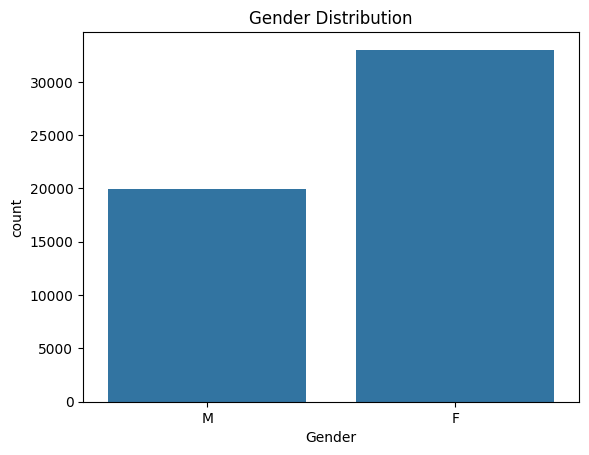

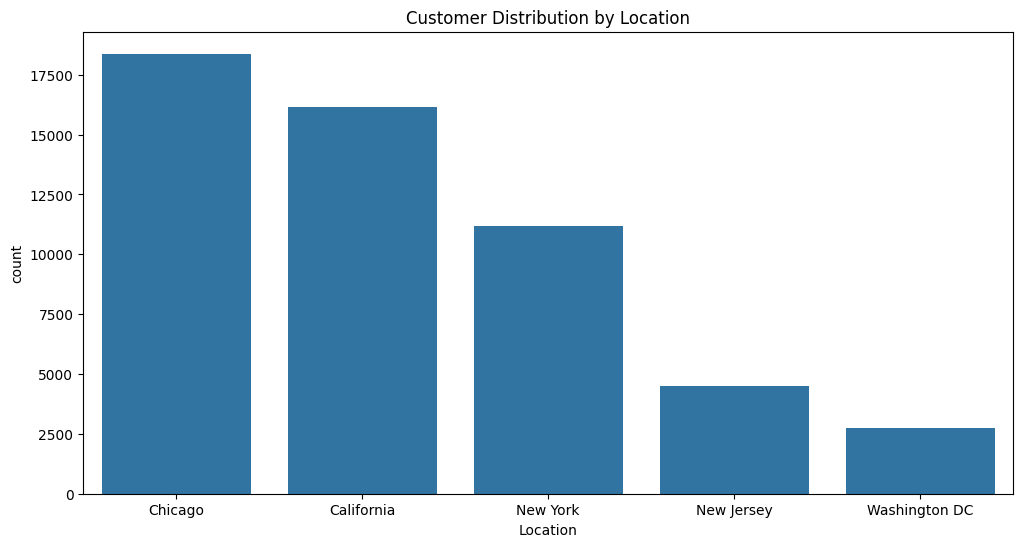

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# 성별 분포
sns.countplot(x='Gender', data=merged_df)
plt.title('Gender Distribution')
plt.show()

# 위치별 고객 수
plt.figure(figsize=(12, 6))
sns.countplot(x='Location', data=merged_df)
plt.title('Customer Distribution by Location')
plt.show()

In [65]:
# 고객의 월별 구매 패턴
# 계절성과 구매패턴에도 관련이 있을지??
merged_df['Month'] = merged_df['Transaction_Date'].dt.to_period('M')
monthly_sales = merged_df.groupby('Month')['Quantity'].sum().reset_index()
monthly_sales.sort_values(ascending=True, by='Month')

,Month,Quantity
0,2019-01,20140
1,2019-02,16575
2,2019-03,20787
3,2019-04,25277
4,2019-05,18715
5,2019-06,21619
6,2019-07,22898
7,2019-08,27457
8,2019-09,19353
9,2019-10,17425


In [54]:
merged_df.columns

Index(['CustomerID', 'Gender', 'Location', 'Tenure_Months', 'Transaction_ID',
       'Transaction_Date', 'Product_SKU', 'Product_Description',
       'Product_Category', 'Quantity', 'Avg_Price', 'Delivery_Charges',
       'Coupon_Status', 'Month'],
      dtype='object')

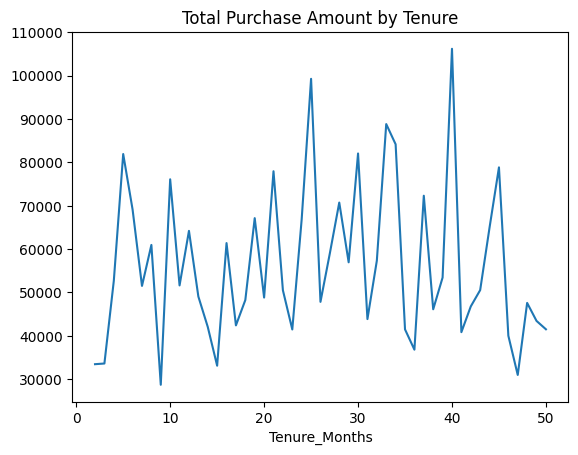

In [67]:
# 고객의 보유 기간에 따른 구매 패턴
tenure_purchase = merged_df.groupby('Tenure_Months')['Avg_Price'].sum()
sns.lineplot(x=tenure_purchase.index, y=tenure_purchase.values)
plt.title('Total Purchase Amount by Tenure')
plt.show()

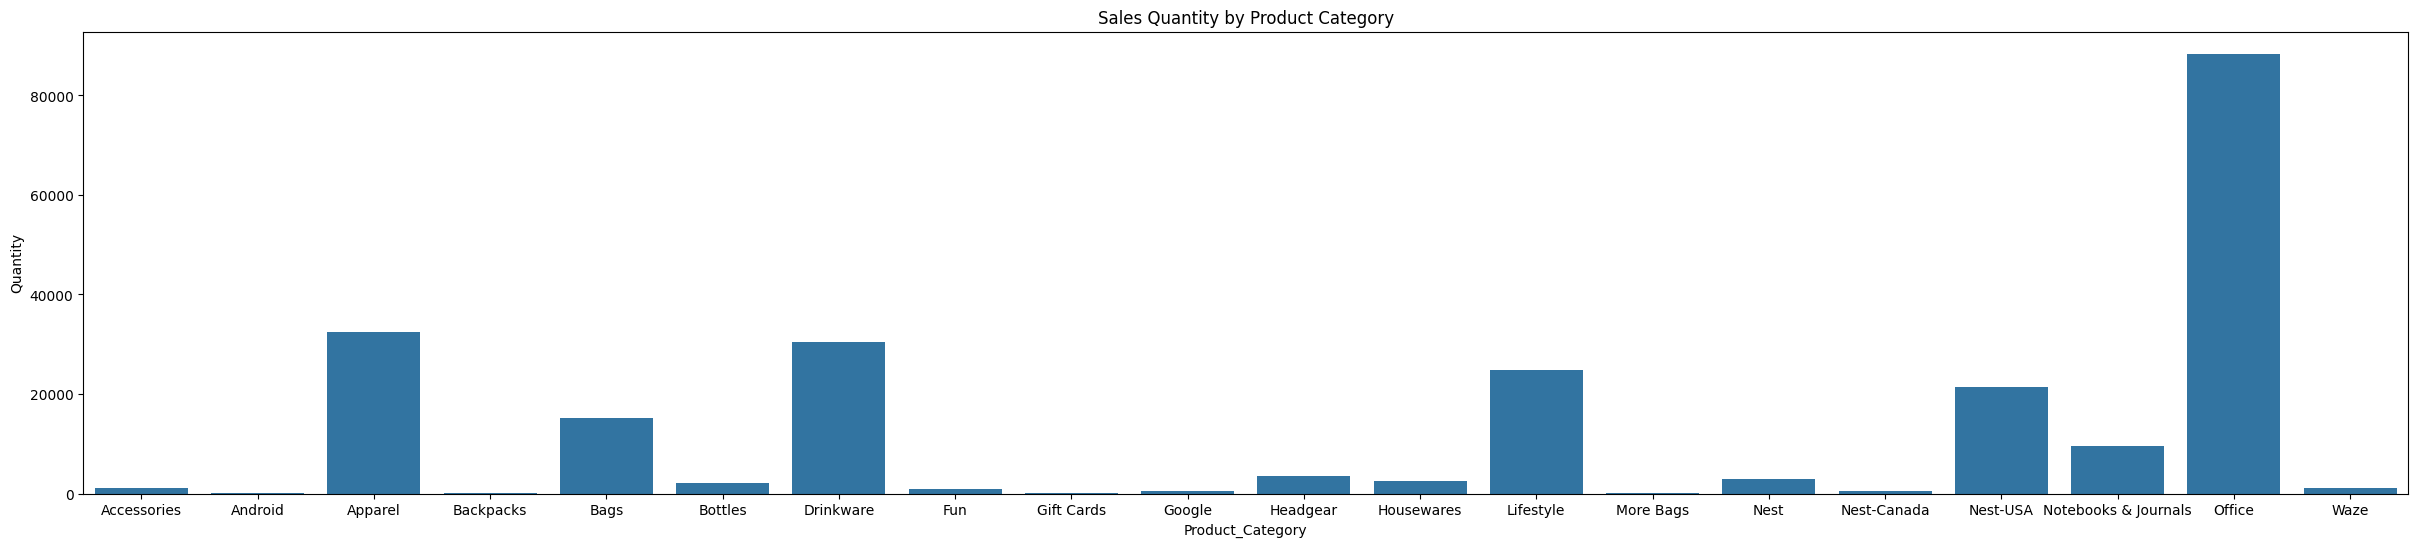

In [74]:
# 제품 카테고리별 판매량
# office 판매량이 가장 높음
plt.figure(figsize=(30, 6))
category_sales = merged_df.groupby('Product_Category')['Quantity'].sum().reset_index()
sns.barplot(x='Product_Category', y='Quantity', data=category_sales)
plt.title('Sales Quantity by Product Category')
plt.show()

In [139]:
category_sales

,Product_Category,Quantity
0,Accessories,1097
1,Android,45
2,Apparel,32438
3,Backpacks,113
4,Bags,15273
5,Bottles,2090
6,Drinkware,30501
7,Fun,834
8,Gift Cards,206
9,Google,575


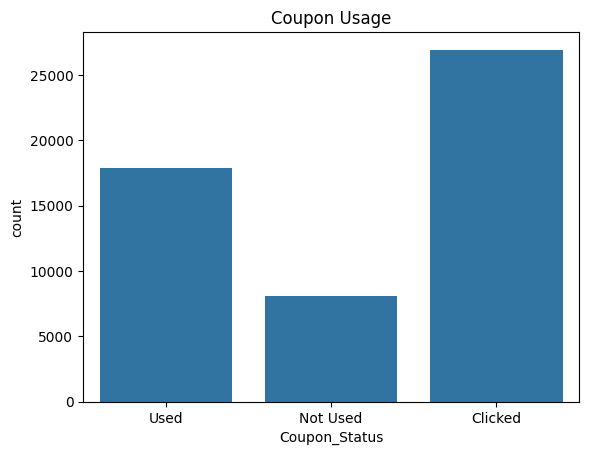

In [75]:
# 쿠폰 사용 여부에 따른 구매 패턴
# 결론 : 쿠폰이 구매로 이어지기는 하나, 클릭만한 경우가 더 많았음
sns.countplot(x='Coupon_Status', data=merged_df)
plt.title('Coupon Usage')
plt.show()

In [78]:
# 가장 많은 구매를 한 고객의 성별

# 고객별 총 구매 금액 계산
merged_df['Total_Purchase'] = merged_df['Quantity'] * merged_df['Avg_Price']
total_purchase = merged_df.groupby('CustomerID')['Total_Purchase'].sum().reset_index()


# 고객별 총 구매 금액 계산
merged_df['Total_Purchase'] = merged_df['Quantity'] * merged_df['Avg_Price']
total_purchase = merged_df.groupby('CustomerID')['Total_Purchase'].sum().reset_index()
print(total_purchase)

# 구매 금액이 가장 많은 고객 정보
max_purchase_customer_id = total_purchase.loc[total_purchase['Total_Purchase'].idxmax(), 'CustomerID']
max_purchase_customer = merged_df[merged_df['CustomerID'] == max_purchase_customer_id]
print(max_purchase_customer)


# 최고 구매 고객의 성별 비중 계산
gender_ratio = merged_df['Gender'].value_counts(normalize=True) * 100
print(gender_ratio)




      CustomerID  Total_Purchase
0          12346           30.99
1          12347        13834.90
2          12348         1442.12
3          12350         1360.07
4          12356         1442.47
...          ...             ...
1463       18259          544.34
1464       18260         2363.05
1465       18269          101.56
1466       18277          298.00
1467       18283         6362.77

[1468 rows x 2 columns]
      CustomerID Gender Location  Tenure_Months  Transaction_ID  \
498        15311      F  Chicago             40           16748   
499        15311      F  Chicago             40           16749   
500        15311      F  Chicago             40           16749   
501        15311      F  Chicago             40           16749   
502        15311      F  Chicago             40           16750   
...          ...    ...      ...            ...             ...   
1080       15311      F  Chicago             40           47523   
1081       15311      F  Chicago           

#### 결론
- 여성 고객의 구매량이 많음
- california, chicago의 비율이 높고, washington DC의 고객 비중이 낮음
- 1,3,7,8월에 구매량이 많음 / 특히 8월
- 가입기간이 40달일 때 구매가 많음
- office 판매량이 압도적으로 많음 -> Apparel,Drinkware 순서
- 쿠폰 사용여부 : 쿠폰 사용이 구매로 이어지기는 하나, 클릭한 경우가 대다수 -> 쿠폰이 매출에 크게 영향을 주진 않는 것 같음
- 여성들 중 chicago 지역의 거주하는 사람과 40개월 정도 보유를 한 경우 구매력이 높았음


### 2) 마케팅 채널 분석

#### 2-1) 기초 통계 분석

In [80]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           365 non-null    object 
 1   Offline_Spend  365 non-null    int64  
 2   Online_Spend   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


In [81]:
df3['Date'] = pd.to_datetime(df3['Date'])


In [82]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           365 non-null    datetime64[ns]
 1   Offline_Spend  365 non-null    int64         
 2   Online_Spend   365 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 8.7 KB


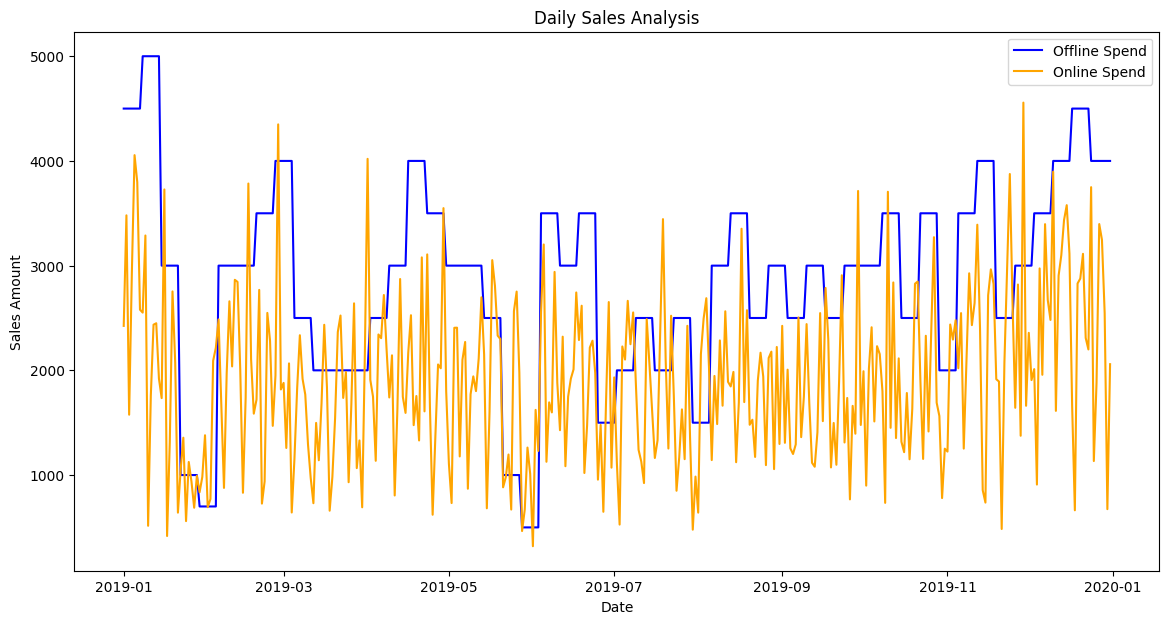

In [83]:
# 날짜별 매출 분석
daily_sales = df3.groupby('Date').agg({'Offline_Spend': 'sum', 'Online_Spend': 'sum'}).reset_index()

plt.figure(figsize=(14, 7))
plt.plot(daily_sales['Date'], daily_sales['Offline_Spend'], label='Offline Spend', color='blue')
plt.plot(daily_sales['Date'], daily_sales['Online_Spend'], label='Online Spend', color='orange')
plt.title('Daily Sales Analysis')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.legend()
plt.show()

In [93]:
daily_sales

,Date,Offline_Spend,Online_Spend
0,2019-01-01,4500,2424.50
1,2019-01-02,4500,3480.36
2,2019-01-03,4500,1576.38
3,2019-01-04,4500,2928.55
4,2019-01-05,4500,4055.30
...,...,...,...
360,2019-12-27,4000,3396.87
361,2019-12-28,4000,3246.84
362,2019-12-29,4000,2546.58
363,2019-12-30,4000,674.31


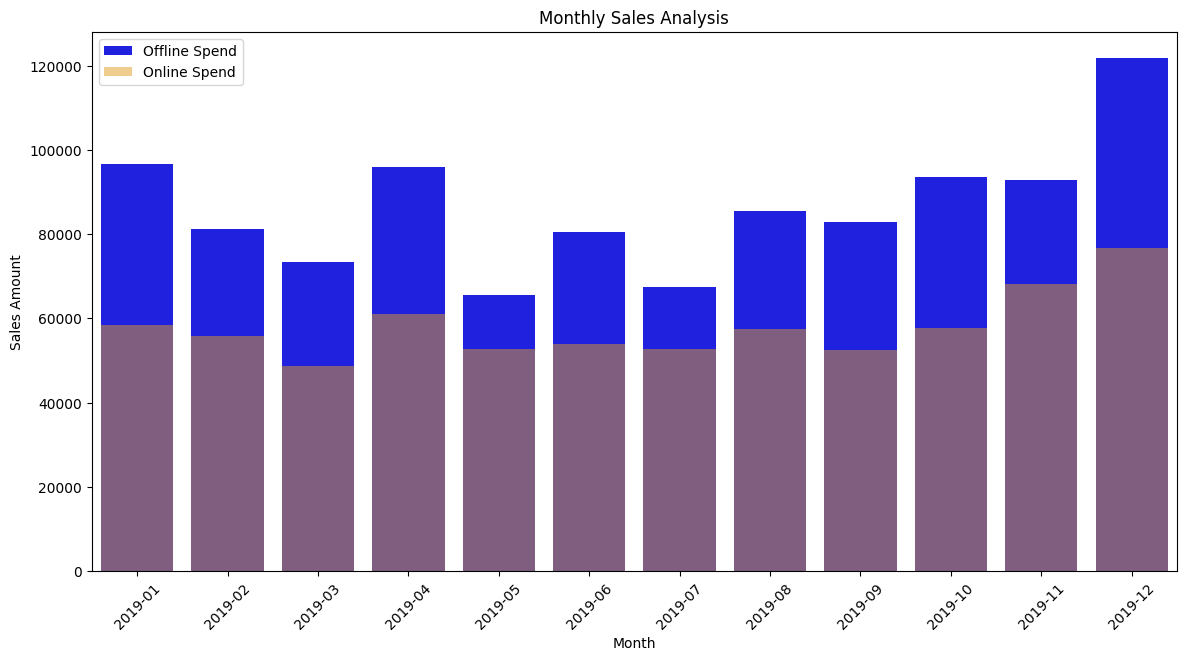

In [87]:
# 월별 매출 분석
df3['Month'] = df3['Date'].dt.to_period('M')
monthly_sales = df3.groupby('Month').agg({'Offline_Spend': 'sum', 'Online_Spend': 'sum'}).reset_index()

plt.figure(figsize=(14, 7))
monthly_sales['Month'] = monthly_sales['Month'].astype(str)  # 문자열로 변환
sns.barplot(x='Month', y='Offline_Spend', data=monthly_sales, color='blue', label='Offline Spend')
sns.barplot(x='Month', y='Online_Spend', data=monthly_sales, color='orange', label='Online Spend', alpha=0.5)
plt.title('Monthly Sales Analysis')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [88]:
# 매출 비율 분석
total_sales = monthly_sales['Offline_Spend'] + monthly_sales['Online_Spend']
monthly_sales['Total_Spend'] = total_sales
monthly_sales['Offline_Ratio'] = monthly_sales['Offline_Spend'] / monthly_sales['Total_Spend']
monthly_sales['Online_Ratio'] = monthly_sales['Online_Spend'] / monthly_sales['Total_Spend']

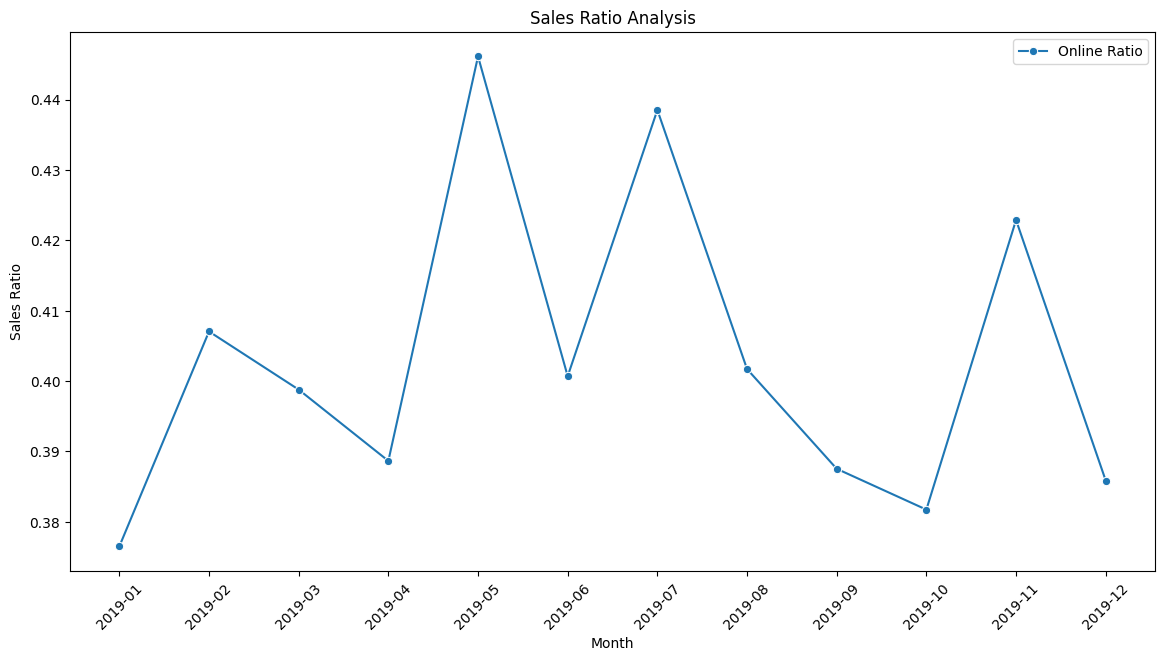

In [91]:
# 비율 시각화
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_sales, x='Month', y='Online_Ratio', label='Online Ratio', marker='o')
plt.title('Sales Ratio Analysis')
plt.xlabel('Month')
plt.ylabel('Sales Ratio')
plt.xticks(rotation=45)
plt.legend()
plt.show()

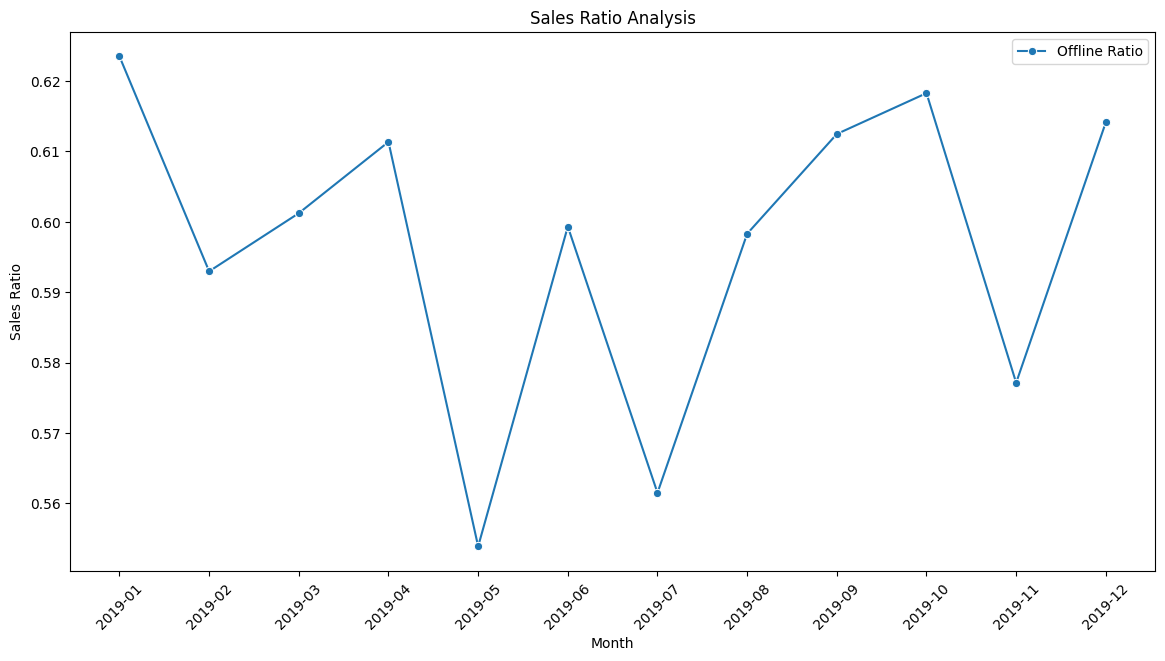

In [92]:
# 비율 시각화
# 오프라인이 변동폭이 큼 -> 오프라인 매출이 떨어지면 온라인 매출이 상승함을 확인할 수 있음
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_sales, x='Month', y='Offline_Ratio', label='Offline Ratio', marker='o')
plt.title('Sales Ratio Analysis')
plt.xlabel('Month')
plt.ylabel('Sales Ratio')
plt.xticks(rotation=45)
plt.legend()
plt.show()

#### 결론
- 오프라인 매출이 하락하는 월에는 온라인 매출이 상승함을 확인할 수 있음
- 온라인 매출 상승 : 2,5,7,11월
- 오프라인 매출 상승 : 1,4,6,10,12월
- 온라인에서 계절에 따라 어떤 프로모션을 진행하는지? (할인률과 온라인, 오프라인의 연관성?)


### 3) 할인쿠폰 분석

In [144]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Month             204 non-null    object
 1   Product_Category  204 non-null    object
 2   Coupon_Code       204 non-null    object
 3   Discount_pct      204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB


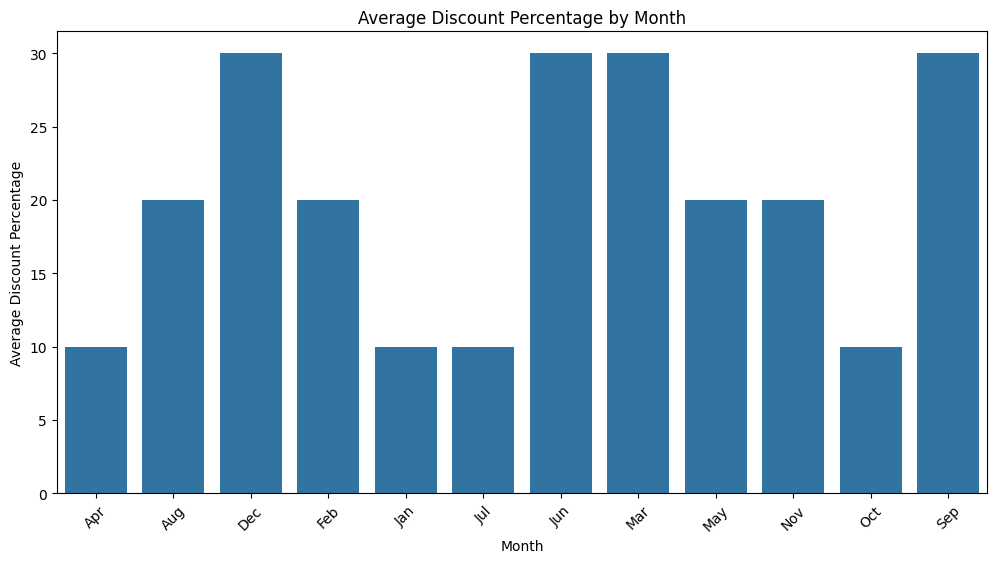

In [145]:
# 월별 평균 할인율 분석
monthly_discount = df2.groupby('Month')['Discount_pct'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Discount_pct', data=monthly_discount)
plt.title('Average Discount Percentage by Month')
plt.xlabel('Month')
plt.ylabel('Average Discount Percentage')
plt.xticks(rotation=45)
plt.show()

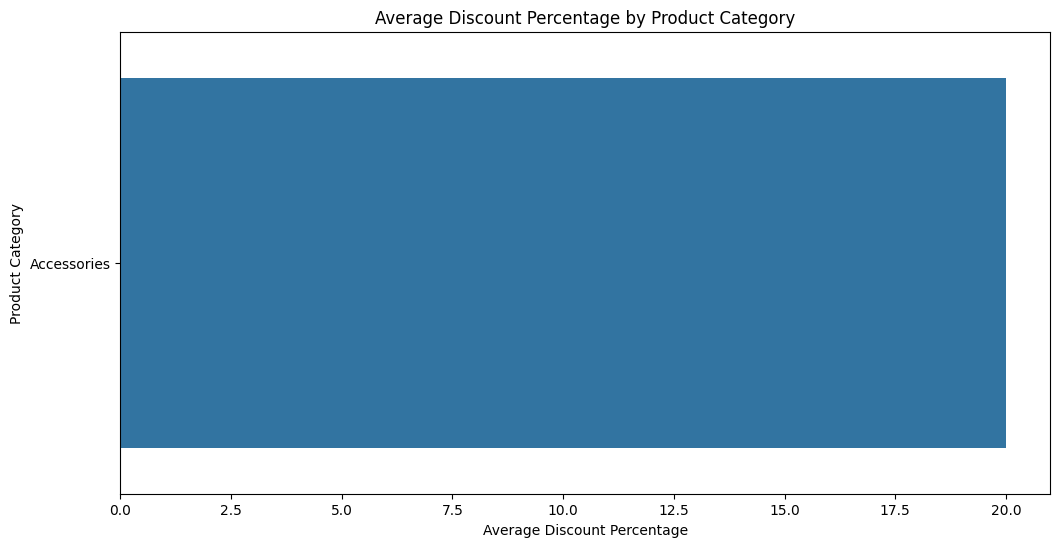

In [135]:
# 제품 카테고리별 할인율 분석
category_discount = df2.groupby('Product_Category')['Discount_pct'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Discount_pct', y='Product_Category', data=category_discount.sort_values('Discount_pct', ascending=False))
plt.title('Average Discount Percentage by Product Category')
plt.xlabel('Average Discount Percentage')
plt.ylabel('Product Category')
plt.show()

   Coupon_Code  Discount_pct
47      WEMP30          30.0
11        BT30          30.0
32        NE30          30.0
38     NOTES30          30.0
29       NCA30          30.0
26       HOU30          30.0
23     HGEAR30          30.0
20        GC30          30.0
17     EXTRA30          30.0
14      ELEC30          30.0
41       OFF30          30.0
35        NJ30          30.0
44      SALE30          30.0
2        ACC30          30.0
8        AND30          30.0
5        AIO30          30.0
1        ACC20          20.0
34        NJ20          20.0
37     NOTES20          20.0
31        NE20          20.0
46      WEMP20          20.0
4        AIO20          20.0
28       NCA20          20.0
25       HOU20          20.0
10        BT20          20.0
43      SALE20          20.0
22     HGEAR20          20.0
40       OFF20          20.0
7        AND20          20.0
19        GC20          20.0
16     EXTRA20          20.0
13      ELEC20          20.0
39       OFF10          10.0
36     NOTES10

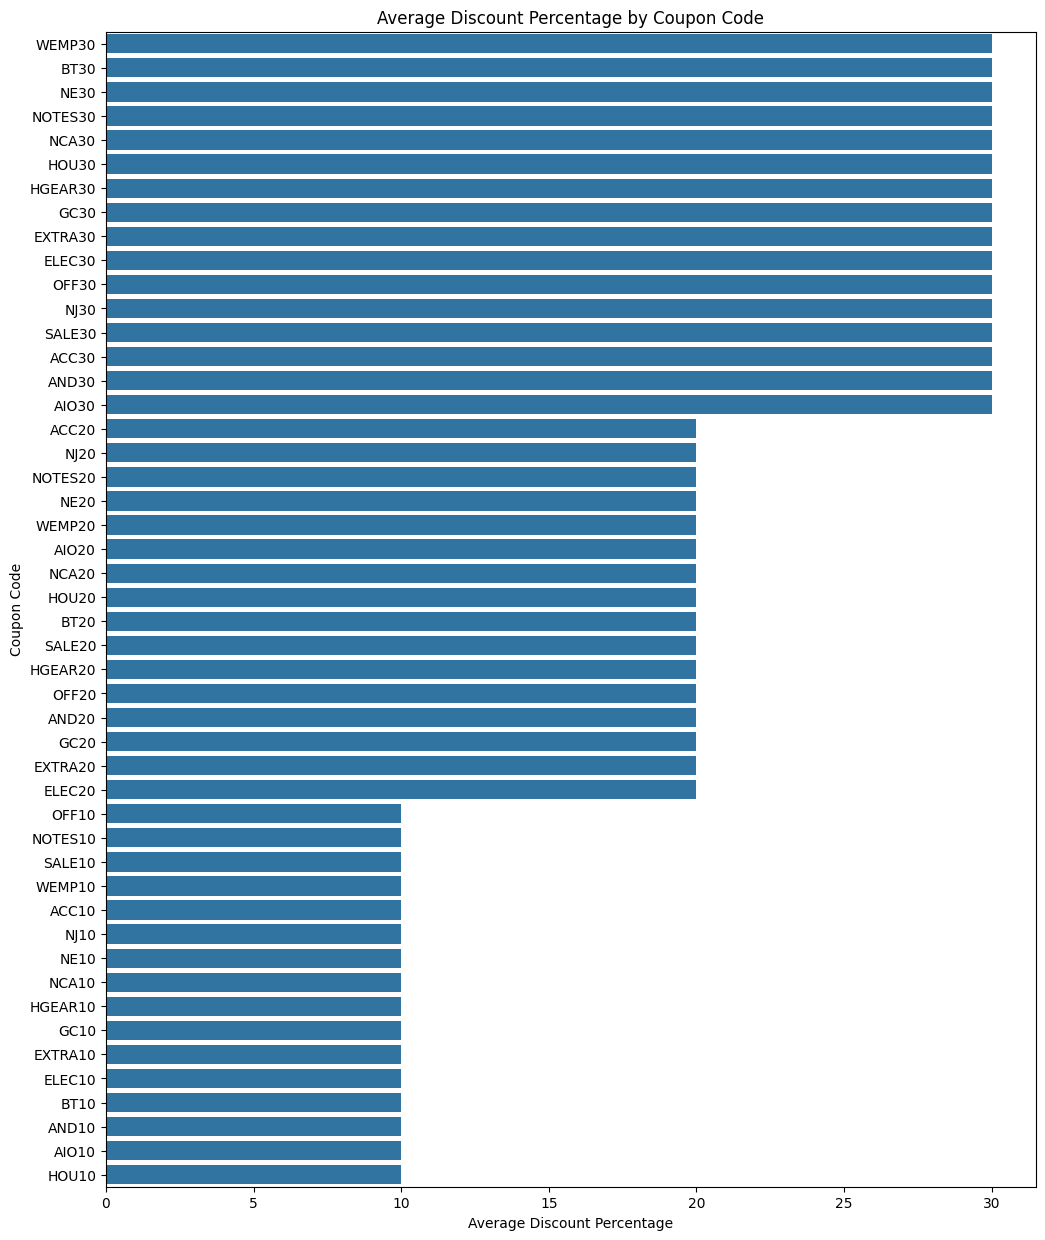

In [136]:
# 쿠폰 코드별 할인율 분석
coupon_discount = df2.groupby('Coupon_Code')['Discount_pct'].mean().reset_index()
print(coupon_discount.sort_values(ascending=False, by='Discount_pct'))

plt.figure(figsize=(12, 15))
sns.barplot(x='Discount_pct', y='Coupon_Code', data=coupon_discount.sort_values('Discount_pct', ascending=False))
plt.title('Average Discount Percentage by Coupon Code')
plt.xlabel('Average Discount Percentage')
plt.ylabel('Coupon Code')
plt.show()


In [109]:
df2

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20
...,...,...,...,...
199,Nov,Notebooks & Journals,NJ20,20
200,Dec,Notebooks & Journals,NJ30,30
201,Oct,Android,AND10,10
202,Nov,Android,AND20,20


In [146]:
df2[df2['Product_Category'] == 'Apparel']

,Month,Product_Category,Coupon_Code,Discount_pct


In [124]:
# 월별 및 상품별 평균 할인률 계산
monthly_product_discount = df2.groupby(['Month', 'Product_Category'])['Discount_pct'].mean().reset_index()

# 각 월별로 할인률이 가장 높은 상품 추출
highest_discount_products = monthly_product_discount.loc[monthly_product_discount.groupby('Month')['Discount_pct'].idxmax()]

# 결과 출력
print(highest_discount_products.sort_values(ascending=False, by='Discount_pct'))


   Month Product_Category  Discount_pct
2    Dec      Accessories          30.0
6    Jun      Accessories          30.0
7    Mar      Accessories          30.0
11   Sep      Accessories          30.0
1    Aug      Accessories          20.0
3    Feb      Accessories          20.0
8    May      Accessories          20.0
9    Nov      Accessories          20.0
0    Apr      Accessories          10.0
4    Jan      Accessories          10.0
5    Jul      Accessories          10.0
10   Oct      Accessories          10.0


In [130]:
df2['Product_Category']

0      Accessories
1      Accessories
2      Accessories
3      Accessories
4      Accessories
          ...     
199    Accessories
200    Accessories
201    Accessories
202    Accessories
203    Accessories
Name: Product_Category, Length: 204, dtype: object

In [141]:
df = df2[df2['Product_Category'] == 'Accessories']
df

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Accessories,SALE10,10
1,Feb,Accessories,SALE20,20
2,Mar,Accessories,SALE30,30
3,Jan,Accessories,ELEC10,10
4,Feb,Accessories,ELEC20,20
...,...,...,...,...
199,Nov,Accessories,NJ20,20
200,Dec,Accessories,NJ30,30
201,Oct,Accessories,AND10,10
202,Nov,Accessories,AND20,20


In [ ]:
total_purchase = merged_df.groupby('CustomerID')['Avg_Price'].sum()
total_purchase.sort_values(ascending=False)

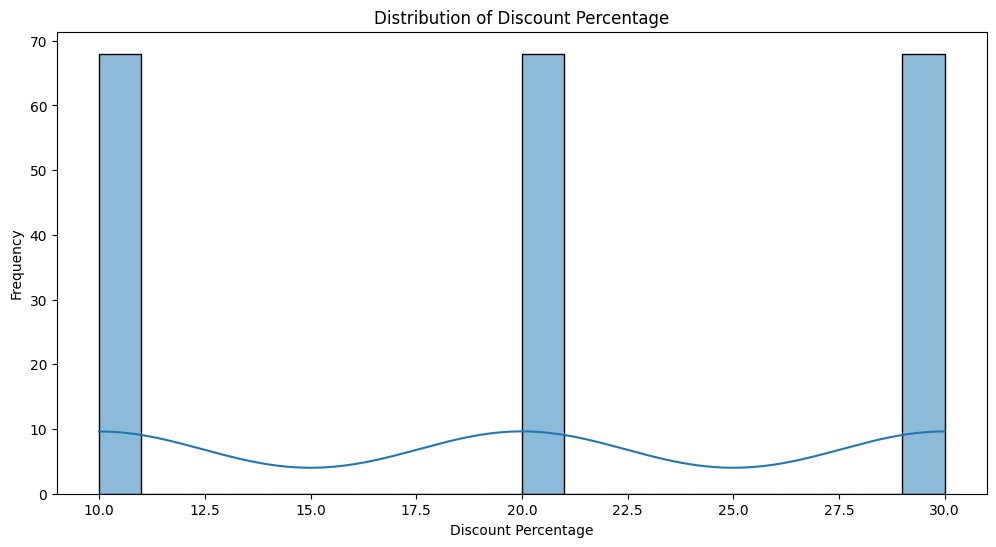

In [127]:
# 할인율 분포 시각화
plt.figure(figsize=(12, 6))
sns.histplot(df2['Discount_pct'], bins=20, kde=True)
plt.title('Distribution of Discount Percentage')
plt.xlabel('Discount Percentage')
plt.ylabel('Frequency')
plt.show()

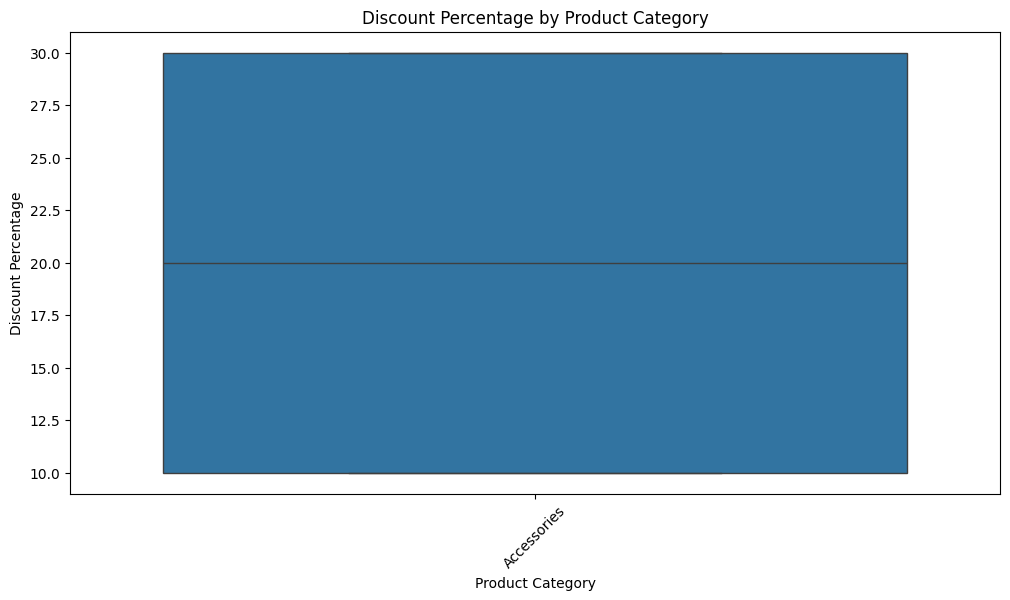

In [128]:
# 상자 그림으로 할인율 분석
plt.figure(figsize=(12, 6))
sns.boxplot(x='Product_Category', y='Discount_pct', data=df2)
plt.title('Discount Percentage by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Discount Percentage')
plt.xticks(rotation=45)
plt.show()

#### 결론
- 악세서리의 할인률이 가장 높음 (2,6,7,11월에 할인 30%) -> 온라인 매출에 악세서리가 영향을 주는지? (온라인 매출이 2,5,7,11월에 높았음)
- 할인률은 10%, 20%, 30%가 가장 많음

#### 더 해볼 수 있는 고민
- 매출이 가장 높았던 상품군은 office 상품인데 악세서리의 할인률이 판매량에 영향을 주지는 않는 것 같음 (즉, 할인률이 매출에 큰 영향을 주는지 확인 필요)